<a href="https://colab.research.google.com/github/Bharatm07/Netflix-s-Content-strategy/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In-Depth Exploratory Data Analysis (EDA) of Netflix's Content strategy**

Exploring trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform.

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [7]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
df.shape

(7787, 12)

In [9]:
df.info() # summarized the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Observations:
*   There are 7787 rows
*   "date_added" is of type object (str), not datetime (needed for time series analysis)
*   Missing values present in the following cols: director, cast, country, date_added, and rating







In [11]:
df.isnull().sum() # Finding Empty values

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


**Data cleaning**
1. Handle missing values in 'director' and 'cast'

In [12]:
# Many are missing -> fill them with 'Unknown'.
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

2. Handle missing 'country'

In [13]:
# Fill with the mode -> most common country.
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

3. Drop the few rows with missing 'date_added' and 'rating'


*   Since the number of missing values is small (less than 0.2% of data), dropping these rows won't affect the data much


In [14]:
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [15]:
df.isnull().sum() #There are no null values the dataset is clean

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


4. Convert 'date_added' to datetime objects

In [16]:
# format='mixed' -> handles potential variations in date formats
# dayfirst=False -> Specifies that when the date format is ambiguous (e.g., 01/02/2023), it should be interpreted as month first (January 2nd)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)


5. Create new features for year and month added

In [17]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [19]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(df.isnull().sum())
print("\nData types after transformation:")
print(df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


**Exploratory Data Analysis & Visualization**

1.   Distribution of content type

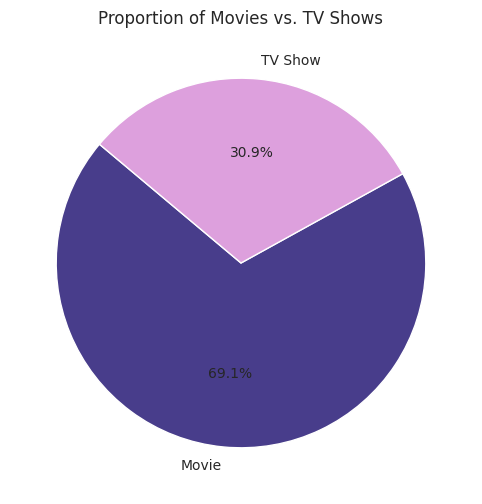

In [20]:
plt.figure(figsize=(8, 6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#483d8b', '#dda0dd'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

Netflix has more movies than series - with almost 70% of the content being movies.

2. How has content been added over time?

<Figure size 1400x800 with 0 Axes>

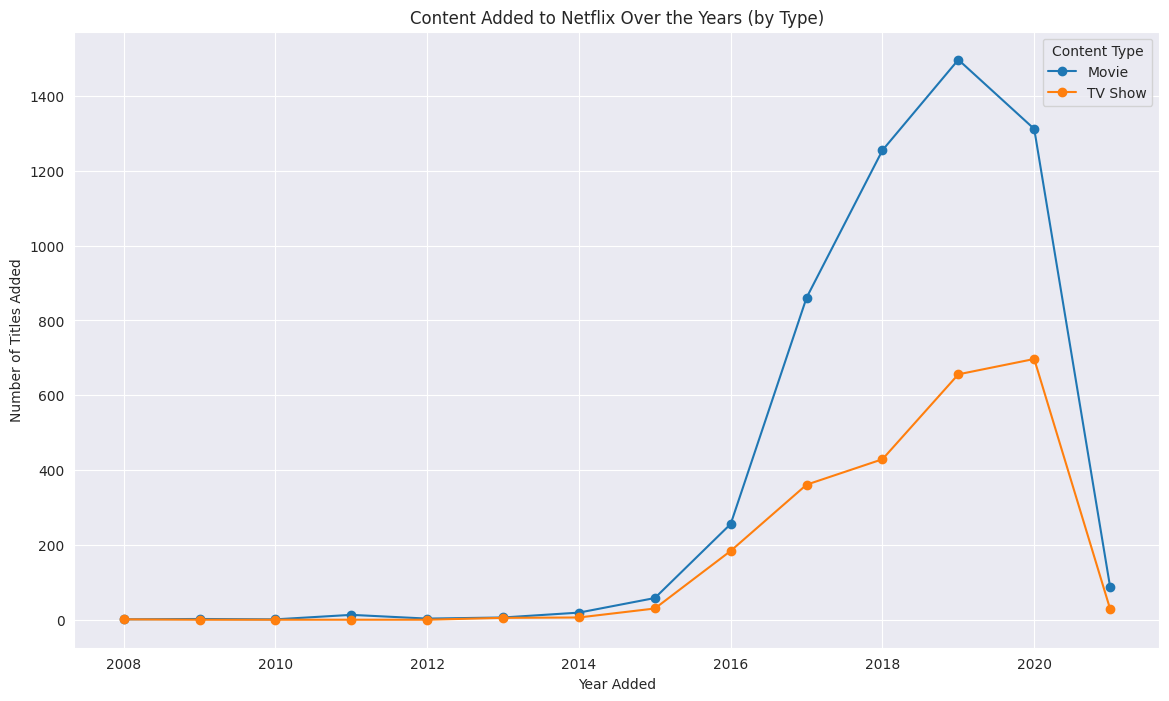

In [21]:
# Group data by year and content type
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

*   The addition of both movies and TV shows to netflix increased with time.
*   Movies had a sharper rise in numbers
*   There is a dip in the number of movies added to netflix at the year 2020 (Could be due to the pandemic)

3. Most popular genres



In [22]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


Hmm...looks like the listed_in column contains strings with multiple genres.

We can:
*   Break up the genres in each row into separate items.
*   Make a new row for each genre, so every title appears once for each of its genres (df.explode for this)

In [23]:
# Split the 'listed_in' column and explode it
# here, we are creating a new dataframe 'genres' where each genre from the 'listed_in' column is split into separate rows
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies


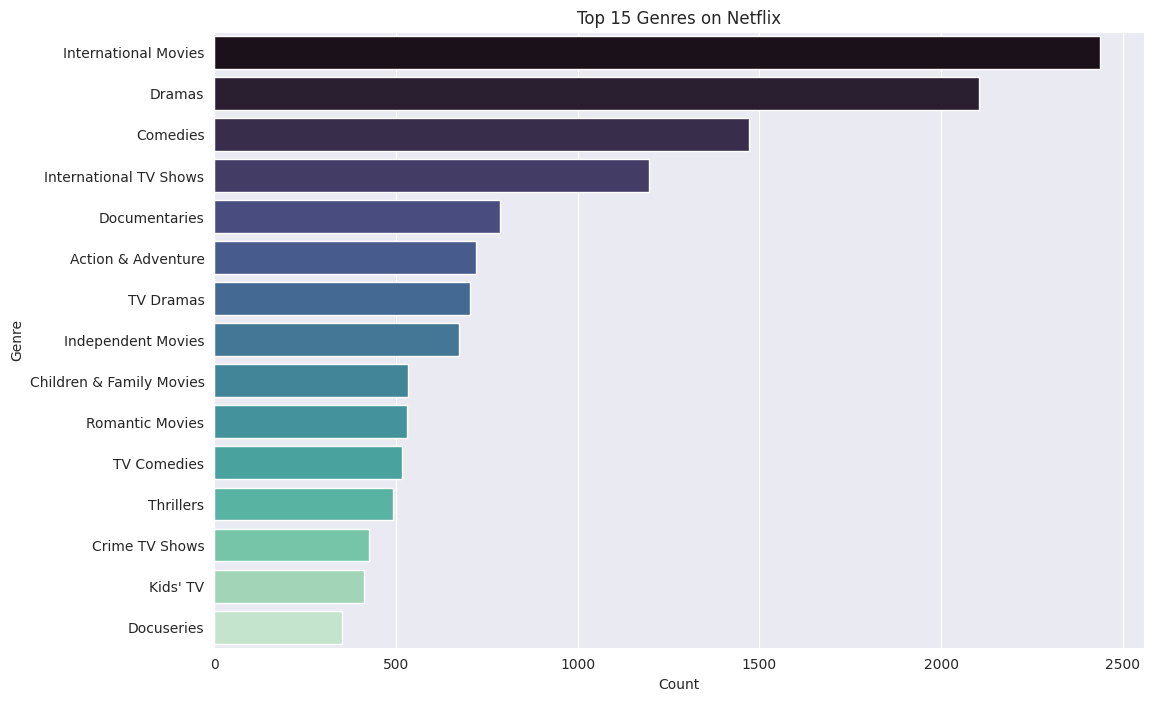

In [24]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

"International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

4. Distribution of content duration

In [25]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [26]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

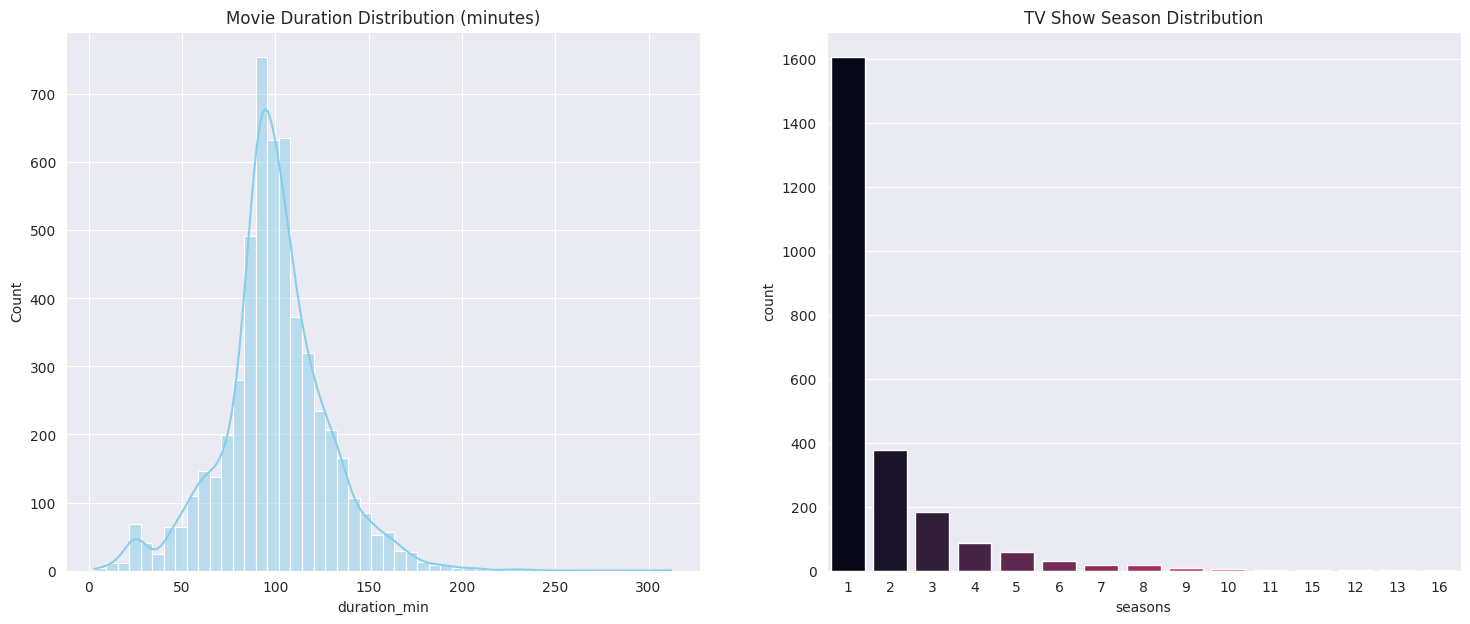

In [27]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

*   The majority of movies on Netflix are between 80 and 120 minutes long.
*   The majority of TV shows on Netflix have 1 season. (Strategy possibility: produce many pilots and only renew the most successful ones or a focus on limited series).

5. Where does the content come from? (Geographical Analysis)

In [28]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [29]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

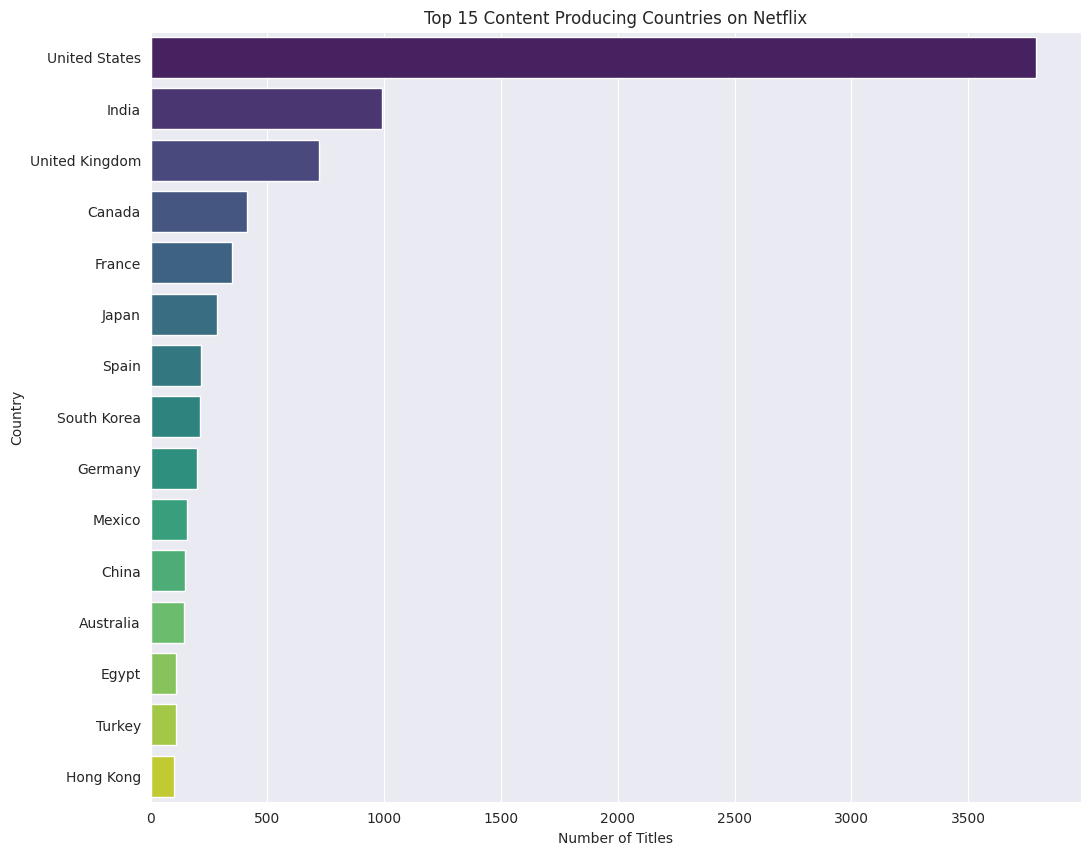

In [30]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

*   The United States produces the most content on Netflix.
*   India is the second largest contributor.
*   The UK, Japan, and South Korea are also major content markets.

6. The maturity ratings of the content

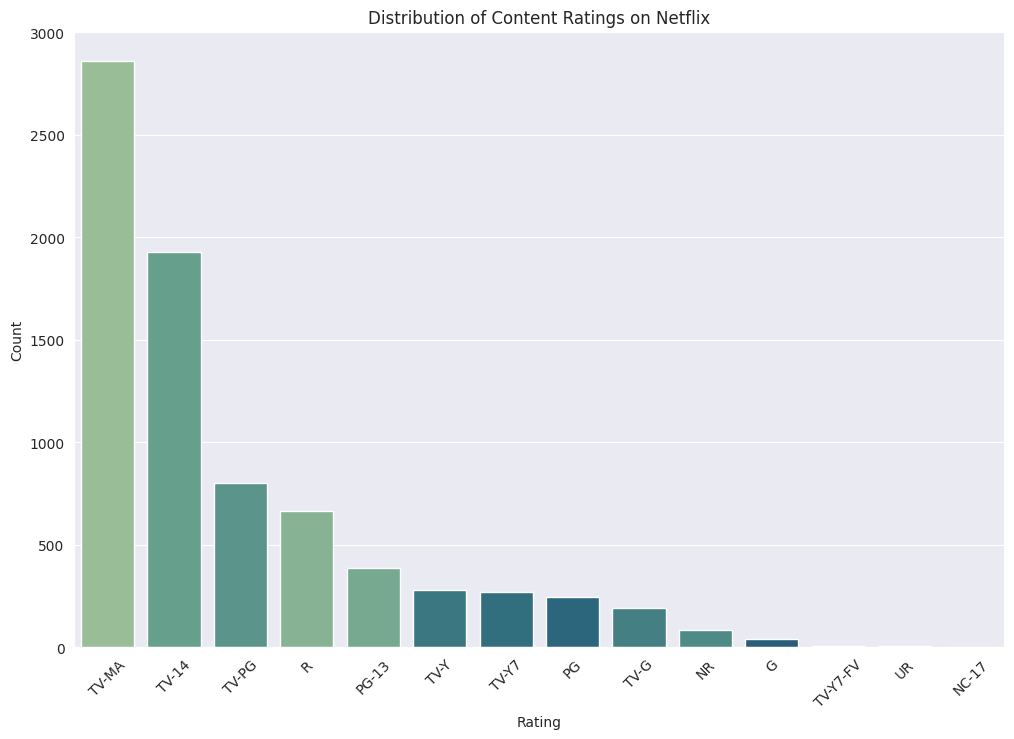

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


*   Most Netflix content is for mature audiences.
*   The most common ratings are TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned).



**Feature engineering**

Creating a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

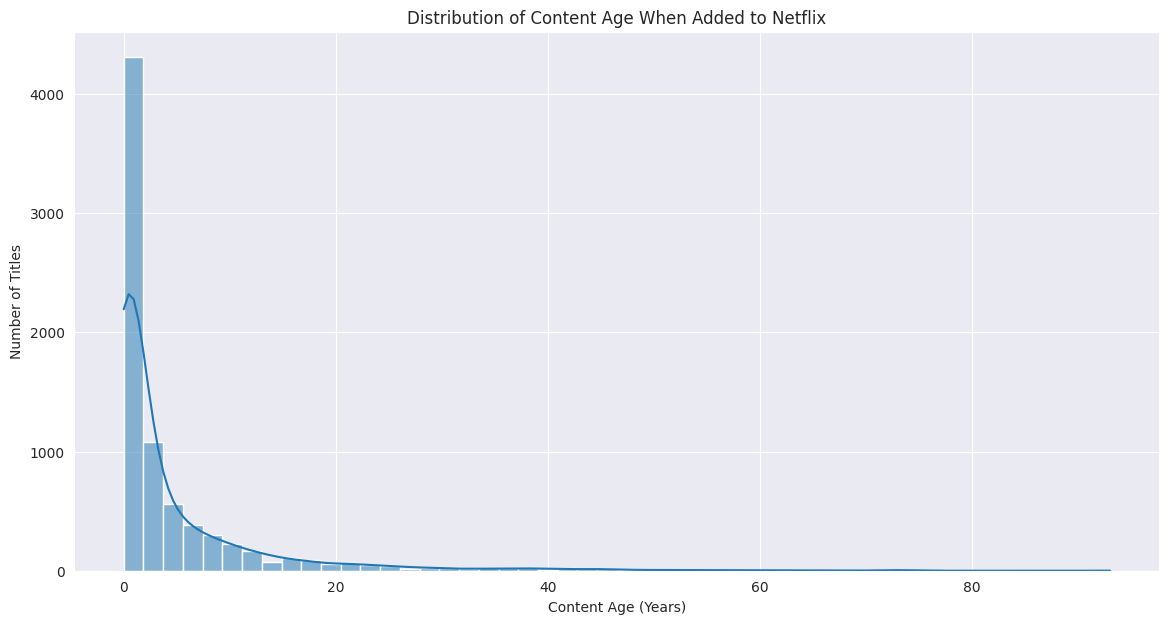

In [32]:
# Create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']
content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

*   Lots of content is added the same year it’s released.
*   TLong tail -> Netflix adds many older, licensed movies and shows to build a large library.


**Multivariate Analysis**

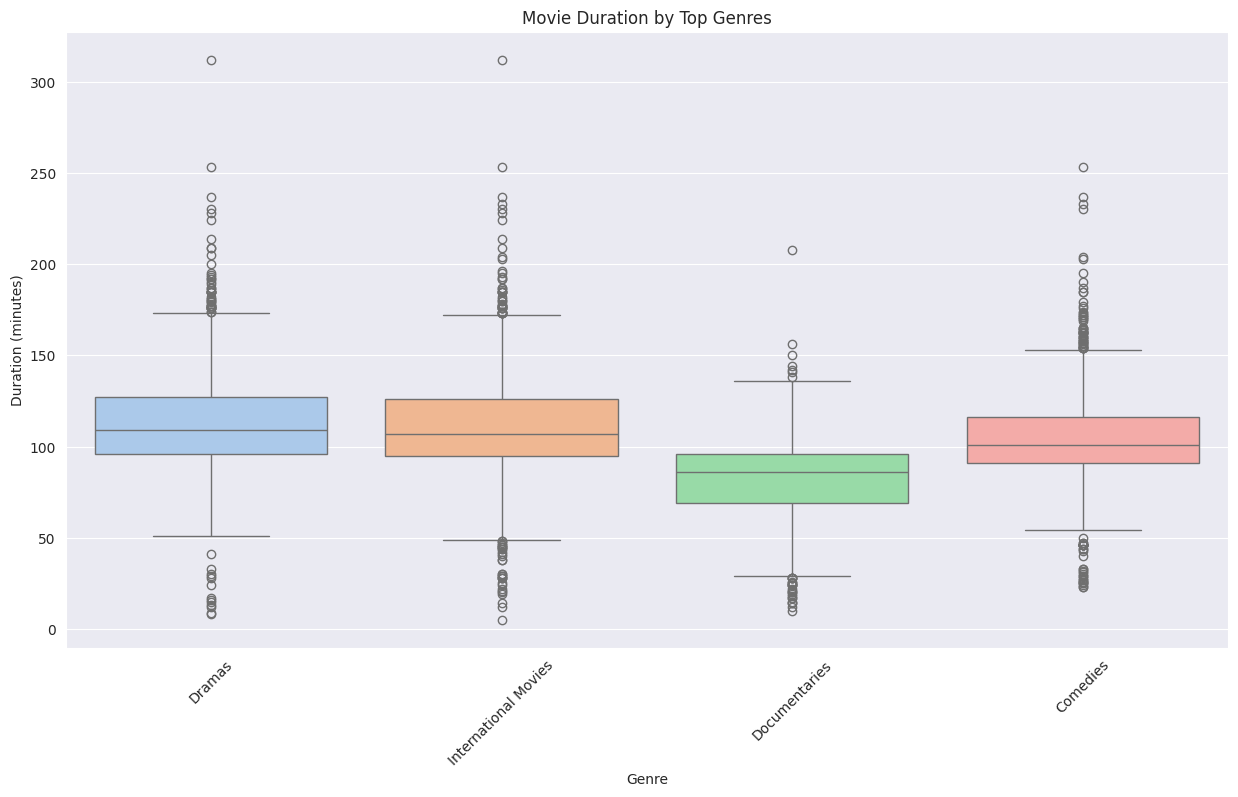

In [33]:
# movie duration vs top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Word Clouds!**

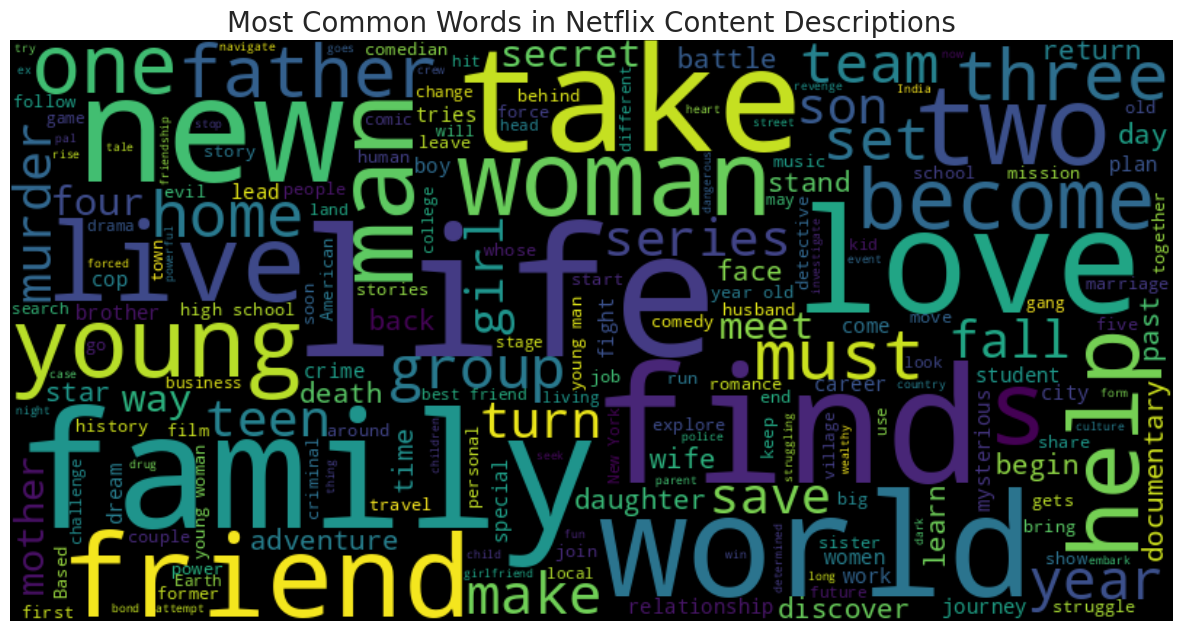

In [34]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Words like "life," "family," and "love" stand out, showing that Netflix stories often center on deep human connections.

The distribution of content ratings changed over time

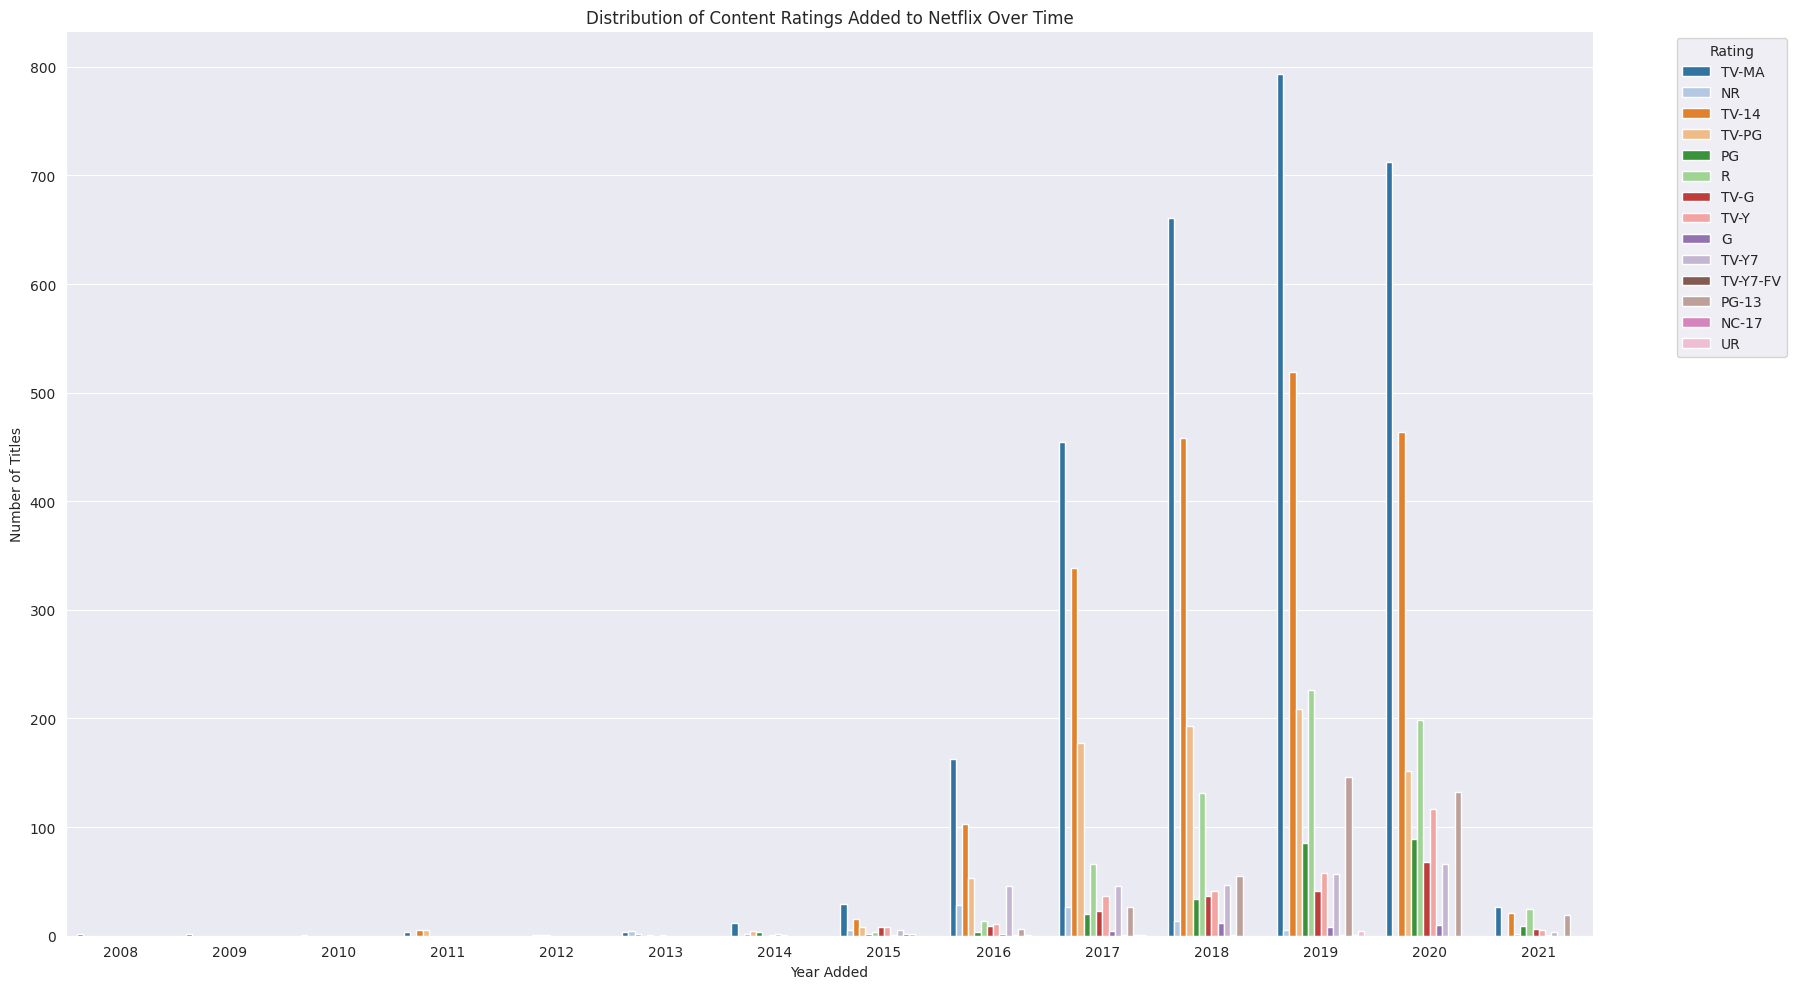

In [35]:
plt.figure(figsize=(18, 10))
sns.countplot(data=df, x='year_added', hue='rating', order=sorted(df['year_added'].dropna().unique()), palette='tab20')
plt.title('Distribution of Content Ratings Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

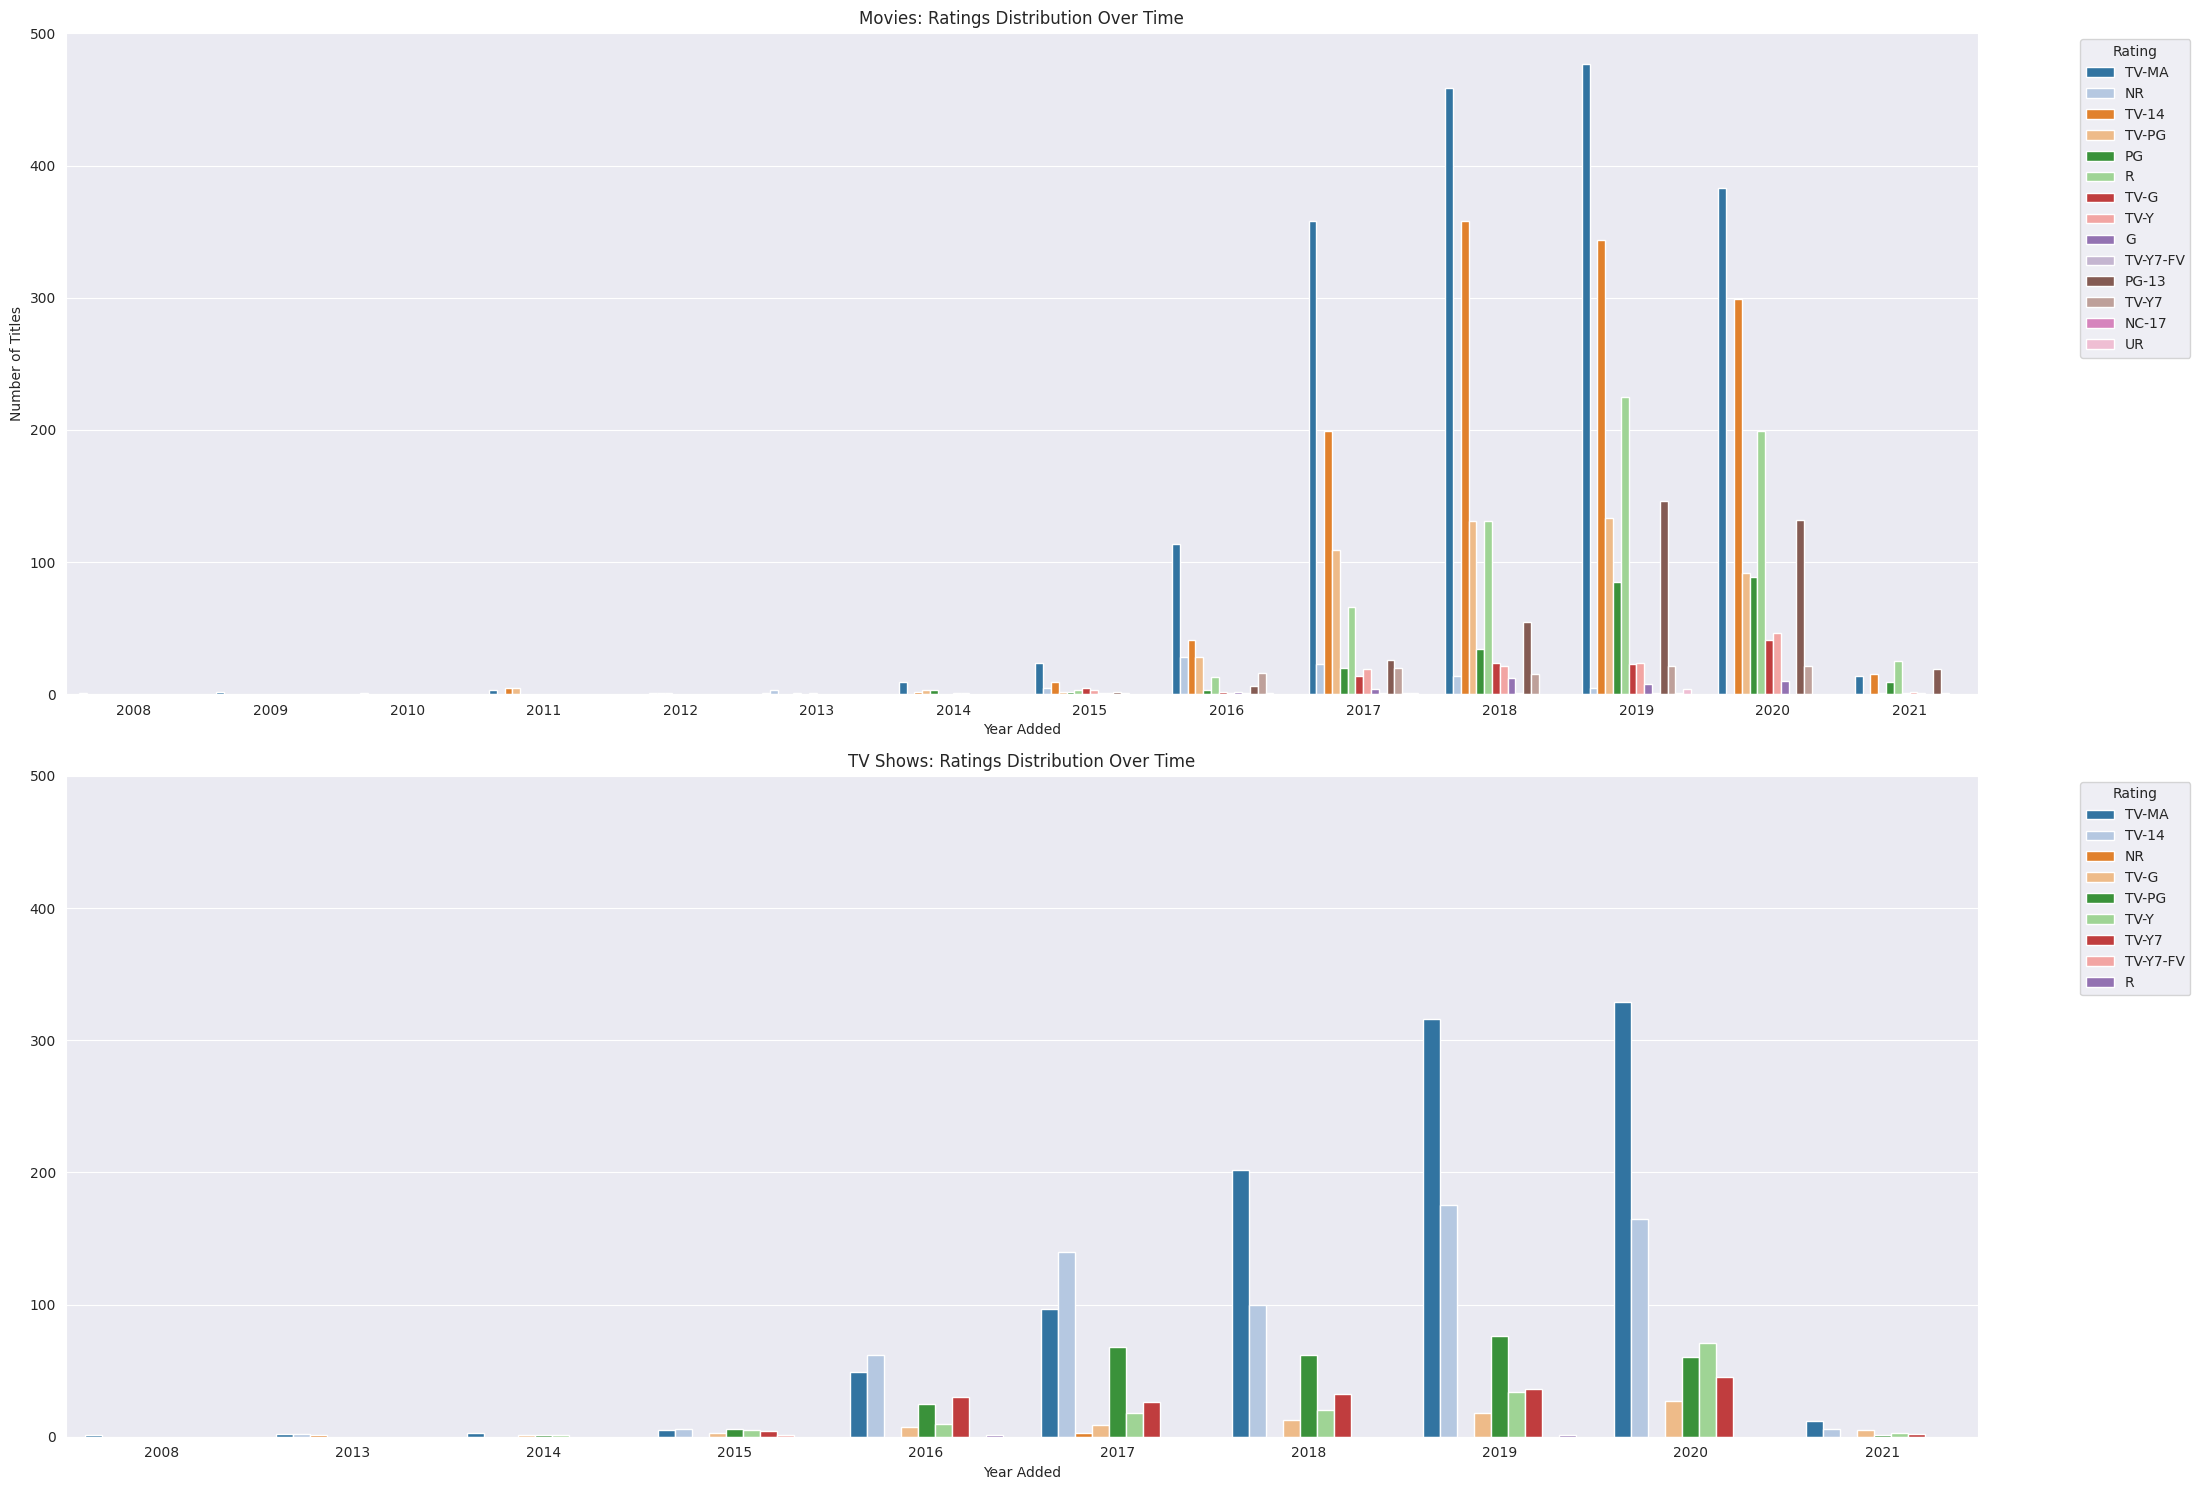

In [36]:
# Let's use the movies and TV shows dfs again --> this will give us 2 separate plots for better insights

fig, axes = plt.subplots(2, 1, figsize=(22, 15), sharey=True)

# Movies subplot
sns.countplot(
    data=movies_df,
    x='year_added',
    hue='rating',
    order=sorted(movies_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[0]
)
axes[0].set_title('Movies: Ratings Distribution Over Time')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Number of Titles')
axes[0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# TV Shows subplot
sns.countplot(
    data=tv_shows_df,
    x='year_added',
    hue='rating',
    order=sorted(tv_shows_df['year_added'].dropna().unique()),
    palette='tab20',
    ax=axes[1]
)
axes[1].set_title('TV Shows: Ratings Distribution Over Time')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('')

axes[1].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [37]:
# Display TV series with rating 'R' (if any)
tv_shows_r = tv_shows_df[tv_shows_df['rating'] == 'R']
tv_shows_r

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
4497,s4498,TV Show,Nobel,Unknown,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,2016-12-10,2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016,12,1
6435,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",United States,2019-04-25,2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019,4,1


*   Increase in Mature content over the years (TV-MA)
*   For most years (exception being 2011-2013), Netflix added in more movies in the mature content (TV-MA) category than any other rating.
*   Similar distribution seen in series too - but 2015-2017 period saw a higher number of TV-14 than TV-MA series
*   Only two series were Rated R: in the years 2015 and 2016

Relationship between content age and its type (Movie vs. TV Show)

In [38]:
content_age.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0


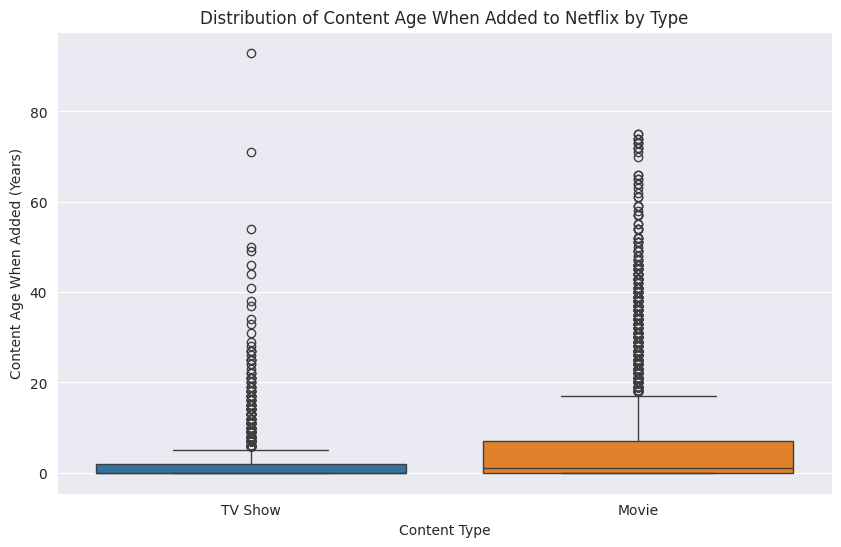

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=content_age, x='type', y='age_on_netflix', hue='type')
plt.title('Distribution of Content Age When Added to Netflix by Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age When Added (Years)')
plt.show()

*   Netflix tends to add in newer shows and movies as we saw above before.
*   Most movies tend to be between the age 0 to 10 years, whereas most shows tend to be between the age 0 to 5 years
*   However, there are quite a few series and movies that do not follow this rule
  - TV shows that are added in, span a larger age range than movies: with the
farthest outlier being over 80 years old
  - Though, the number of TV shows added outside the general age-range is lesser. Meaning: Netflix is more likely to add in older movies than older TV shows






Identify any trends in content production based on the release year vs. the year added to Netflix

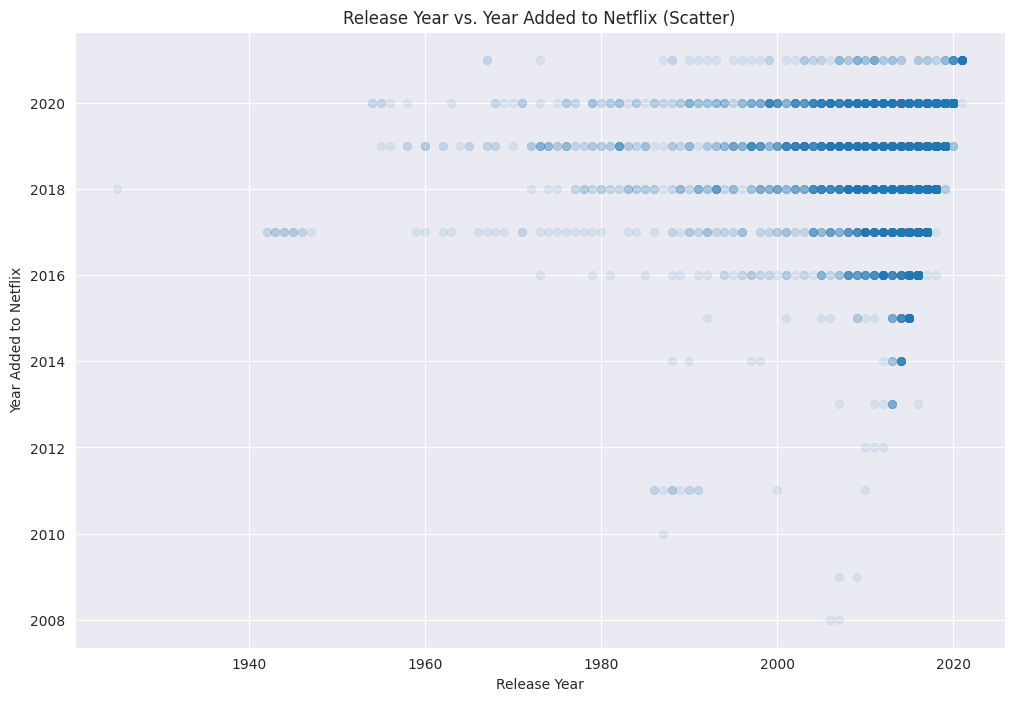

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x='release_year', y='year_added',
    alpha=0.1, edgecolor=None
)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('Release Year vs. Year Added to Netflix (Scatter)')
plt.show()

hmm...doesn't look too clear

Maybe another plot type?

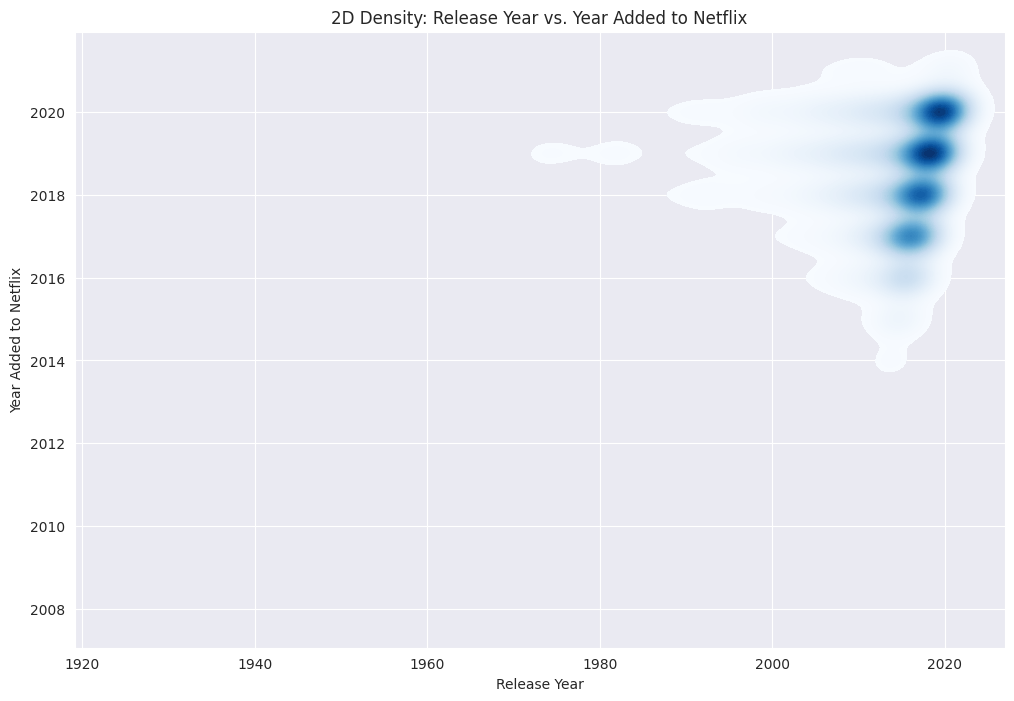

In [41]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df, x='release_year', y='year_added',
    fill=True, cmap='Blues', thresh=0.05, levels=100
)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('2D Density: Release Year vs. Year Added to Netflix')
plt.show()

*   The density plot shows a much clearer picture
*  Most years netflix added in shows and movies that were recently released
*   Netflix added in more older shows between the years 2018 and 2020

The most common word pairs or phrases in content descriptions

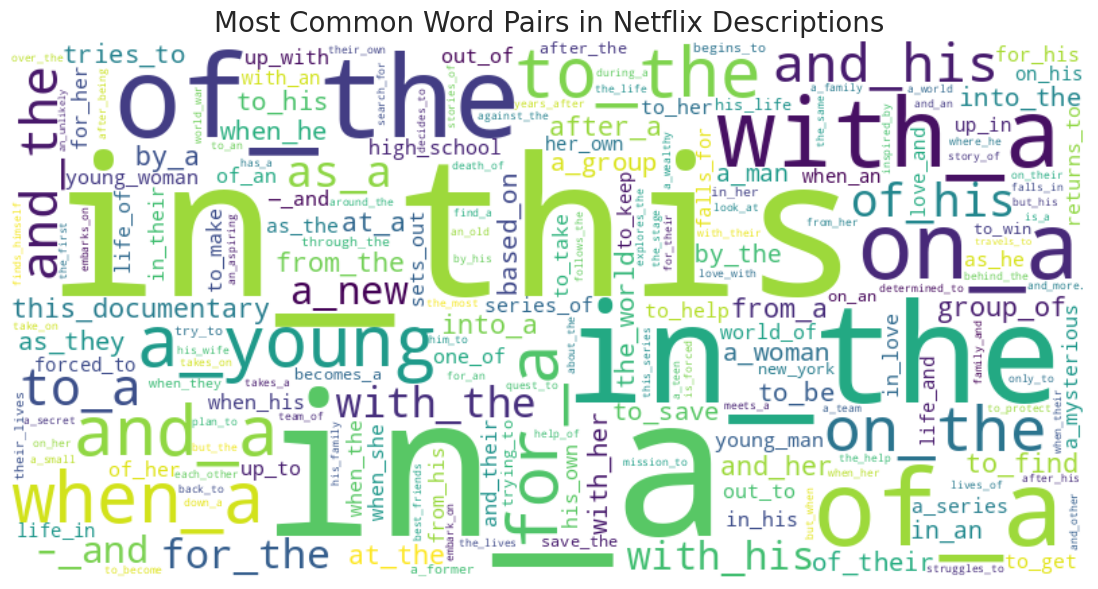

In [42]:
from wordcloud import WordCloud
from collections import Counter

# Prepare bigrams from all descriptions
all_words = ' '.join(df['description'].dropna()).lower().split()
bigrams = ['_'.join([all_words[i], all_words[i+1]]) for i in range(len(all_words)-1)]

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Generate a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Descriptions', fontsize=20)
plt.show()

well...that was kind of expected - what if we clean up the stop words a little?

stopwords: prepositions, articles and other words that usually do not add much meaning to text analysis.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


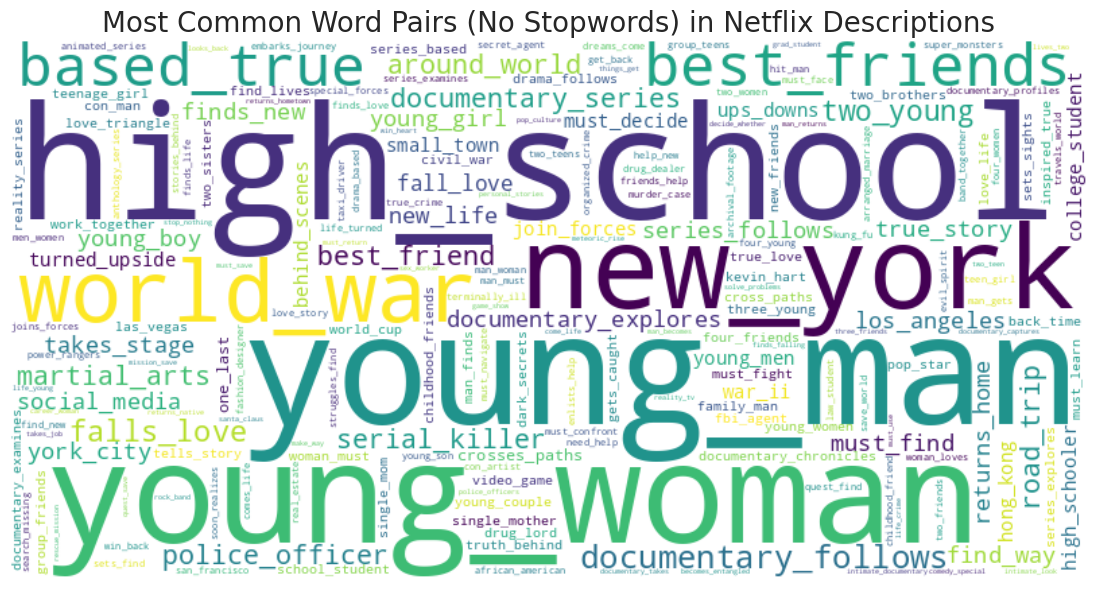

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and clean
all_words = ' '.join(df['description'].dropna()).lower().split()
filtered_words = [w for w in all_words if w.isalpha() and w not in stop_words]

# Create bigrams from filtered words
bigrams = ['_'.join([filtered_words[i], filtered_words[i+1]]) for i in range(len(filtered_words)-1)]

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Generate a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

plt.figure(figsize=(15, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs (No Stopwords) in Netflix Descriptions', fontsize=20)
plt.show()

*   "High school" seems to be the most common theme
*   Closely followed by young man/ young woman
*   New york, world war, documentary series, best friend all appear often too
*   Shows that Netflix has both factual content and stories that focus on different life stages and cultural backdrops.

The top directors on Netflix

In [44]:
# Top 10 directors with the most titles on Netflix (excluding 'Unknown')
top_directors = (
    df[df['director'] != 'Unknown']['director']
    .value_counts()
    .head(50)
    .reset_index()
)
top_directors.columns = ['Director', 'Number of Titles']
top_directors

,Director,Number of Titles
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
5,Jay Chapman,12
6,Youssef Chahine,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Lance Bangs,8


/tmp/ipython-input-472112247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')


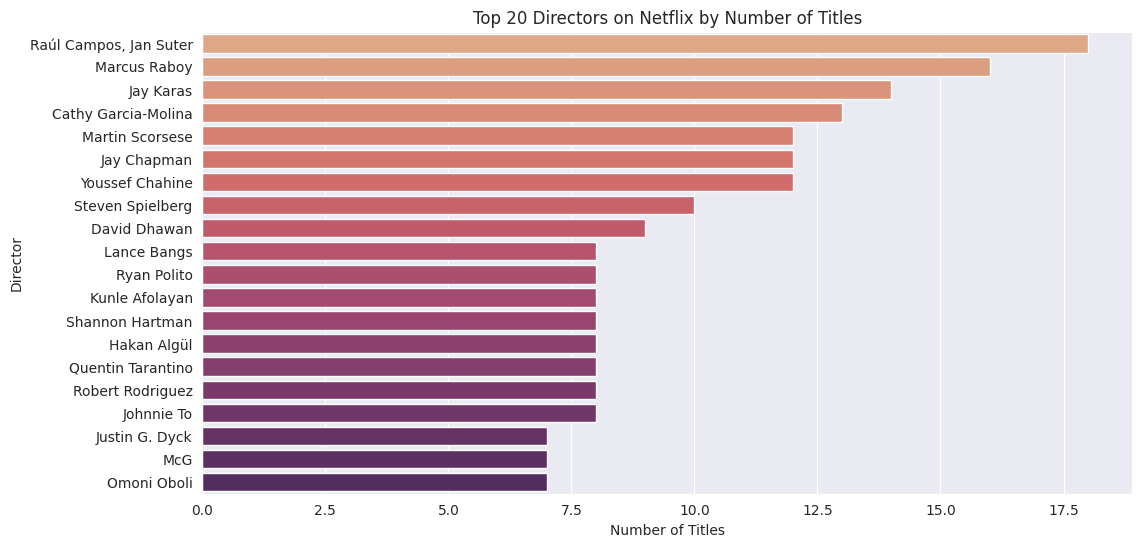

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(20), palette='flare')
plt.title('Top 20 Directors on Netflix by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

*   The director pair: Raúl Campos and Jan Suter have the most number of titles (Googling them shows that they specialize in latin americal comedy content)
*   CLosely follwed by Marcus Raboy and Jay Karas